In [1]:
#import packages
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [45]:
X.head()

Asset_liq  Capital_stock_ratio  Solvency  Debt_ratio       ROA       ROE  \
0   5.395511             0.698138  0.822026    9.613153  4.572577  4.259781   
1   6.064944             0.650479  1.030284    9.900787  4.465659  4.204000   
2   6.714514             1.235661  2.251166    9.913105  5.085268  4.638331   
3   7.507364             1.372185  2.318197    9.918399  4.795360  4.393849   
4   7.348318             0.927348  2.639040    9.936844  5.012241  4.768626   

   Inv_port  Return_on_inv  Prem_non-life_ins  Direct_sales  Reserves_life  \
0  4.202826       8.258074           3.443128      3.641012            0.0   
1  4.327324      10.000000           2.893034      6.010471            0.0   
2  6.342999      10.000000           3.457095      2.809325            0.0   
3  5.055320       1.181407           3.650654      4.069173            0.0   
4  5.958946       3.431652           2.495168      3.473250            0.0   

   Reserves_non-life  Market_rate  Return_insurance  \
0           0.565141     0.414038          2.926244   
1           0.632016     0.388993          2.907728   
2           0.696635     0.454709          3.173785   
3           0.832768     0.481338          3.060023   
4           1.370677     0.519202          3.112625   

   Reinsurers_credit_quality  Loss_ratio  Max_payout  Life  Owner_struc  \
0                   5.000000    4.086049    9.275028    10          2.5   
1                   5.000000    3.447933    9.329812    10          2.5   
2                   5.000000    3.789970    9.541214    10          2.5   
3                   5.000000    4.752701    9.581501    10          2.5   
4                   7.940999    4.569239    9.609379    10          2.5   

   Owner_infl  Development_strategy  Governance  Risk_management  \
0        10.0                   5.0         5.0              5.0   
1        10.0                   5.0         5.0              5.0   
2        10.0                   7.5         5.0              5.0   
3        10.0                   7.5         5.0              5.0   
4        10.0                   7.5         5.0              5.0   

   Auditor_quality  Actuarial_valuation  Centre  East  Siberia  Lowest_20  \
0              7.5                  0.0      10     0        0   0.000000   
1              7.5                  0.0      10     0        0   2.222222   
2              7.5                 10.0      10     0        0   5.555556   
3              7.5                 10.0      10     0        0   6.666667   
4              5.0                 10.0      10     0        0   6.666667   

   Life_expectancy  Mortality_rate   Revenue  Unemployment  GDP_pc_const  \
0         0.000000        0.000000  7.326115      1.134022      5.731343   
1         0.793241        1.621622  9.292903      4.226806      3.862930   
2         2.908942        3.513514  0.656258      0.000000      0.000000   
3         5.159587        5.405405  0.000000      0.103095      0.017732   
4         8.915747        7.027027  0.696668      3.711341      2.975623   

   Actives_gdp  ROE_average  Prem_gdp  Numb_contr       Pay    Pay_gdp  \
0     0.094340     0.000000  0.000000    0.000000  0.000000  10.000000   
1     0.000000     2.433628  0.689655    2.638484  2.772538   7.668335   
2     0.188679     7.654867  4.482759    0.758017  4.732583   9.185071   
3     1.792453     6.061947  7.931034    4.169096  4.411575   6.076392   
4     6.132075     5.044248  8.620690    7.857143  4.623230   3.531956   

       Prem  Prem_pop   Pay_pop   Pay_prem  
0  0.000000  0.000000  0.000000   7.786192  
1  1.412911  1.351351  2.800076   8.766796  
2  2.075104  1.621622  4.262533  10.000000  
3  4.742575  4.594595  4.157203   5.213750  
4  6.466217  6.216216  4.136561   3.147791

In [2]:
ini_data = pd.ExcelFile('Data_update.xlsx')
#df = ini_data.parse('data')
fin_data = ini_data.parse('fin_data')
qual_data = ini_data.parse('qualitative data')
macro_data = ini_data.parse('macro_data')
ind_data = ini_data.parse('industrial_data')

In [3]:
fin_data.drop(['Number', 'Name', 'Year'], axis=1, inplace=True)
qual_data.drop(['Number', 'Name', 'Year','Субъект','Федеральный округ'], axis=1, inplace=True)
macro_data.drop(['Number', 'Name', 'Year'], axis=1, inplace=True)
ind_data.drop(['Number', 'Name', 'Year'], axis=1, inplace=True)

In [4]:
fin_data.head()

Default   Cur_liq  Asset_liq  Capital_adequacy  Capital_stock_ratio  \
0        1  0.757025   0.711013          0.148484             0.530288   
1        1  0.972931   0.744634          0.173071             0.488499   
2        1  1.006764   0.777258          0.341899             1.001601   
3        1  1.264968   0.817078          0.315830             1.121309   
4        1  1.142587   0.809090          0.217673             0.731265   

   Solvency  Debt_ratio  Return_oper       ROA       ROE  Inv_port  \
0  0.429779    0.011640     0.460239  0.025121  0.075739  0.535467   
1  0.538663    0.002985     0.412531  0.021840  0.069435  0.545404   
2  1.176975    0.002615     0.417858  0.040852  0.118517  0.706294   
3  1.212020    0.002455     0.527153  0.031956  0.090889  0.603512   
4  1.379767    0.001900     0.496896  0.038611  0.133241  0.675639   

   Return_on_inv  Prem_life_ins  Prem_non-life_ins  Direct_sales  \
0       0.121920            0.0           0.159431      0.349989   
1       0.285004            0.0           0.031893      0.577751   
2       0.198888            0.0           0.162669      0.270044   
3      -0.010274            0.0           0.207545      0.391145   
4       0.031761            0.0          -0.060351      0.333863   

   Reserves_life  Reserves_non-life  Market_rate  Return_insurance  \
0              0          1416109.0     0.001768          0.033269   
1              0          1583519.0     0.001666          0.030923   
2              0          1745282.0     0.001933          0.064628   
3              0          2086068.0     0.002041          0.050216   
4              0          3432628.0     0.002195          0.056880   

   Reinsurers_credit_quality  Loss_ratio  Max_payout  
0                     0.5000    1.017234    0.027057  
1                     0.5000    1.126993    0.025012  
2                     0.5000    1.068161    0.017122  
3                     0.5000    0.902566    0.015619  
4                     0.7941    0.934122    0.014578

In [4]:
def norm(data, mod, reverse):
    
    for i in range (0, data.shape[1]):
        
        if (data[data.columns[i]].name in reverse) == False:
            
            if mod==True:
                low = data[data.columns[i]].quantile(0.05)
                high = data[data.columns[i]].quantile(0.95)
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] >= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] <=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
                    
            elif mod==False:
                
                low = data[data.columns[i]].min()
                high = data[data.columns[i]].max()
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] >= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] <=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
            
           
        elif (data[data.columns[i]].name in reverse) == True:
            
            if mod==True:
                low = data[data.columns[i]].quantile(0.95)
                high = data[data.columns[i]].quantile(0.05)
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] <= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] >=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
                
           
            elif mod==False:
                
                low = data[data.columns[i]].max()
                high = data[data.columns[i]].min()
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] <= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] >=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
                
        i=+1
        
    return data



In [13]:
fin_data.columns

Index(['Default', 'Cur_liq', 'Asset_liq', 'Capital_adequacy',
       'Capital_stock_ratio', 'Solvency', 'Debt_ratio', 'Return_oper', 'ROA',
       'ROE', 'Inv_port', 'Return_on_inv', 'Prem_life_ins',
       'Prem_non-life_ins', 'Direct_sales', 'Reserves_life',
       'Reserves_non-life', 'Market_rate', 'Return_insurance',
       'Reinsurers_credit_quality', 'Loss_ratio', 'Max_payout'],
      dtype='object')

In [5]:
Default = fin_data['Default']
print(len(Default),type(Default), Default.value_counts())

1042 <class 'pandas.core.series.Series'> 1    874
0    168
Name: Default, dtype: int64


In [6]:
Default

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [6]:
cols = ['Asset_liq','Capital_stock_ratio', 'Solvency', 'Debt_ratio', 'ROA', 'ROE', 'Inv_port', 
           'Return_on_inv', 'Prem_non-life_ins', 'Direct_sales', 'Reserves_life','Reserves_non-life', 
           'Market_rate', 'Return_insurance','Reinsurers_credit_quality', 'Loss_ratio', 'Max_payout',
         
        'Life', 'Owner_struc', 'Owner_infl','Development_strategy', 'Governance', 'Risk_management',
       'Auditor_quality', 'Actuarial_valuation', 'Centre', 'East','Siberia' ,
       
       'Lowest_20', 'Life_expectancy', 'Mortality_rate','Revenue', 'Unemployment', 'GDP_pc_const',
        'Actives_gdp', 'ROE_average', 'Prem_gdp', 'Numb_contr','Pay',
       'Pay_gdp', 'Prem', 'Prem_pop', 'Pay_pop', 'Pay_prem']

In [7]:
norm(fin_data, mod=True, reverse = ['Debt_ratio','Loss_ratio','Max_payout'])

Default    Cur_liq  Asset_liq  Capital_adequacy  Capital_stock_ratio  \
0          10   1.038955   5.395511          0.966268             0.698138   
1          10   1.465761   6.064944          1.019575             0.650479   
2          10   1.532643   6.714514          1.385608             1.235661   
3          10   2.043063   7.507364          1.329089             1.372185   
4          10   1.801138   7.348318          1.116276             0.927348   
5          10   1.451991   6.016955          0.873498             0.767861   
6          10   1.319905   5.591467          0.840478             0.808765   
7          10   4.456455  10.000000          3.544668             1.626067   
8          10   3.978027  10.000000          3.118220             1.657918   
9          10   1.827359   8.635516          4.389798             2.281864   
10         10   1.497556   8.136043          3.327236             1.677963   
11         10   1.773430   8.556043          3.661565             1.101507   
12         10   2.865593   9.092294          5.343875             2.371773   
13         10   2.068811   9.569339          2.847986             1.346752   
14         10   3.797901   5.551474          4.941021             2.472554   
15         10   1.955884   5.790946          2.176374             0.729590   
16         10   2.642323   6.297475          2.743446             1.505424   
17         10   3.091464   6.908590          3.030515             1.406443   
18         10   2.648574   7.034545          2.153630             1.063476   
19         10   2.437765   6.956791          1.892833             0.779394   
20         10   1.694234   5.889449          1.125385             0.133058   
21         10   0.849869   5.267812          0.409959             0.458864   
22         10   0.613943   4.614057          0.318214             0.462607   
23         10   0.611399   4.946062          0.319472             0.543367   
24         10   0.598722   5.621661          0.368833             0.587945   
25         10   0.682194   6.380969          0.613598             0.719702   
26         10   0.744350   6.563081          0.651209             0.885173   
27         10   0.628633   5.904418          0.594302             0.915780   
28         10   0.546449   4.084542          0.116360             0.787646   
29         10   0.581747   4.118241          0.000000             0.128790   
30         10   1.131013   3.732731          0.214056             0.320408   
31         10   1.523176   6.259932          0.993576             0.953457   
32         10   1.181696   4.725742          0.920304             0.906608   
33         10   1.638649   6.064173          1.206403             1.362030   
34         10   1.882025   6.071122          1.406344             2.386322   
35         10   1.249770   6.082282          1.378748             0.670123   
36         10   1.157016   6.630535          0.879292             0.387477   
37         10   1.442665   7.308361          0.752055             0.295287   
38         10   0.406899   6.520298          0.000000             0.000000   
39         10   1.751246   7.556426          0.910366             0.553892   
40         10   2.002996   7.745177          1.188883             0.944662   
41         10   1.392745   5.486694          0.587053             0.753240   
42         10   1.021137   1.509124          0.108050             0.000000   
43         10   0.794432   3.136952          0.235019             0.261936   
44         10   0.848432   4.273676          0.277429             0.033499   
45         10   0.821314   3.963386          0.359045             0.113475   
46         10   1.093875   5.482745          0.611899             0.664513   
47         10   1.466390   6.643767          0.891469             0.865387   
48         10   1.491103   6.732291          0.742021             0.644342   
49         10   1.346393   5.787607          1.103409             0.548306   
50         10   1.951362   6

In [9]:
fin_data.describe()

Default      Cur_liq    Asset_liq  Capital_adequacy  \
count  1042.000000  1042.000000  1042.000000       1042.000000   
mean      8.387716     2.155747     5.684762          2.025248   
std       3.679181     2.414498     2.733476          2.436977   
min       0.000000     0.000000     0.000000          0.000000   
25%      10.000000     0.708837     3.763166          0.644341   
50%      10.000000     1.357420     5.892687          1.108389   
75%      10.000000     2.472809     7.859592          2.254344   
max      10.000000    10.000000    10.000000         10.000000   

       Capital_stock_ratio     Solvency   Debt_ratio  Return_oper  \
count          1042.000000  1042.000000  1042.000000  1042.000000   
mean              2.368234     2.524537     8.926825     3.476229   
std               2.650692     2.635883     2.631679     2.541443   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.623341     0.738770     9.837437     1.675488   
50%               1.357542     1.582021    10.000000     2.914215   
75%               3.016300     3.362112    10.000000     4.888186   
max              10.000000    10.000000    10.000000    10.000000   

               ROA          ROE     Inv_port  Return_on_inv  Prem_life_ins  \
count  1042.000000  1042.000000  1042.000000    1042.000000    1042.000000   
mean      4.777176     4.675849     6.743443       4.970913       1.935920   
std       2.352359     2.283228     2.862467       2.492701       2.199503   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%       3.753844     3.589551     5.201529       3.398581       1.324742   
50%       4.572044     4.370755     7.531985       5.087286       1.324742   
75%       5.916413     5.821267     8.898100       6.460056       1.324742   
max      10.000000    10.000000    10.000000      10.000000      10.000000   

       Prem_non-life_ins  Direct_sales  Reserves_life  Reserves_non-life  \
count        1042.000000   1042.000000    1042.000000        1042.000000   
mean            3.507095      2.733248       1.037984           1.180439   
std             2.207230      3.005473       2.680489           2.411374   
min             0.000000      0.000000       0.000000           0.000000   
25%             2.425616      0.183496       0.000000           0.056300   
50%             3.067768      1.744191       0.000000           0.262796   
75%             4.098332      4.065726       0.004385           0.866664   
max            10.000000     10.000000      10.000000          10.000000   

       Market_rate  Return_insurance  Reinsurers_credit_quality   Loss_ratio  \
count  1042.000000       1042.000000                1042.000000  1042.000000   
mean      1.159079          3.575515                   5.522224     4.830305   
std       2.418406          2.201105                   3.588303     2.429168   
min       0.000000          0.000000                   0.000000     0.000000   
25%       0.078546          2.663633                   2.000000     3.640661   
50%       0.218794          3.091848                   6.500000     4.410410   
75%       0.796152          3.971876                   8.785917     5.770648   
max      10.000000         10.000000                  10.000000    10.000000   

        Max_payout  
count  1042.000000  
mean      8.654724  
std       2.546304  
min       0.000000  
25%       8.766150  
50%       9.746651  
75%      10.000000  
max      10.000000

In [16]:
macro_data.columns

Index(['Default', 'Lowest_20', 'Life_expectancy', 'Mortality_rate',
       'GDP_growth', 'Inflation', 'Revenue', 'Unemployment', 'Interest_rate',
       'Exchange_rate', 'GDP_pc_const'],
      dtype='object')

In [8]:
norm(macro_data,mod=False,reverse=['Mortality_rate','Inflation','Unemployment'])

Default  Lowest_20  Life_expectancy  Mortality_rate  GDP_growth  \
0          10   0.000000         0.000000        0.000000    8.268130   
1          10   2.222222         0.793241        1.621622    6.007887   
2          10   5.555556         2.908942        3.513514    0.000000   
3          10   6.666667         5.159587        5.405405    4.804580   
4          10   6.666667         8.915747        7.027027    8.424189   
5          10   7.777778        10.000000        8.648649   10.000000   
6          10  10.000000         8.635028       10.000000    7.350981   
7          10   0.000000         0.000000        0.000000    8.268130   
8          10   2.222222         0.793241        1.621622    6.007887   
9          10   5.555556         2.908942        3.513514    0.000000   
10         10   6.666667         5.159587        5.405405    4.804580   
11         10   6.666667         8.915747        7.027027    8.424189   
12         10   7.777778        10.000000        8.648649   10.000000   
13         10  10.000000         8.635028       10.000000    7.350981   
14         10   0.000000         0.000000        0.000000    8.268130   
15         10   2.222222         0.793241        1.621622    6.007887   
16         10   5.555556         2.908942        3.513514    0.000000   
17         10   6.666667         5.159587        5.405405    4.804580   
18         10   6.666667         8.915747        7.027027    8.424189   
19         10   7.777778        10.000000        8.648649   10.000000   
20         10  10.000000         8.635028       10.000000    7.350981   
21         10   0.000000         0.000000        0.000000    8.268130   
22         10   2.222222         0.793241        1.621622    6.007887   
23         10   5.555556         2.908942        3.513514    0.000000   
24         10   6.666667         5.159587        5.405405    4.804580   
25         10   6.666667         8.915747        7.027027    8.424189   
26         10   7.777778        10.000000        8.648649   10.000000   
27         10  10.000000         8.635028       10.000000    7.350981   
28         10   0.000000         0.000000        0.000000    8.268130   
29         10   2.222222         0.793241        1.621622    6.007887   
30         10   5.555556         2.908942        3.513514    0.000000   
31         10   6.666667         5.159587        5.405405    4.804580   
32         10   6.666667         8.915747        7.027027    8.424189   
33         10   7.777778        10.000000        8.648649   10.000000   
34         10  10.000000         8.635028       10.000000    7.350981   
35         10   0.000000         0.000000        0.000000    8.268130   
36         10   2.222222         0.793241        1.621622    6.007887   
37         10   5.555556         2.908942        3.513514    0.000000   
38         10   6.666667         5.159587        5.405405    4.804580   
39         10   6.666667         8.915747        7.027027    8.424189   
40         10   7.777778        10.000000        8.648649   10.000000   
41         10  10.000000         8.635028       10.000000    7.350981   
42         10   0.000000         0.000000        0.000000    8.268130   
43         10   2.222222         0.793241        1.621622    6.007887   
44         10   5.555556         2.908942        3.513514    0.000000   
45         10   6.666667         5.159587        5.405405    4.804580   
46         10   6.666667         8.915747        7.027027    8.424189   
47         10   7.777778        10.000000        8.648649   10.000000   
48         10  10.000000         8.635028       10.000000    7.350981   
49         10   0.000000         0.000000        0.000000    8.268130   
50         10   2.222222         0.793241        1.621622    6.007887   
51         10   5.555556         2.908942        3.513514    0.000000   
52         10   6.666667         5.159587        5.405405    4.804580   
53         10   6.666667         8.915747        7.027027    8.4

In [18]:
macro_data.describe()

Default    Lowest_20  Life_expectancy  Mortality_rate   GDP_growth  \
count  1042.000000  1042.000000      1042.000000     1042.000000  1042.000000   
mean      8.387716     5.382811         5.007761        4.970172     6.325980   
std       3.679181     3.120507         3.780534        3.358668     3.077237   
min       0.000000     0.000000         0.000000        0.000000     0.000000   
25%      10.000000     2.222222         0.793241        1.621622     4.804580   
50%      10.000000     6.666667         5.159587        5.405405     7.350981   
75%      10.000000     7.777778         8.915747        8.648649     8.424189   
max      10.000000    10.000000        10.000000       10.000000    10.000000   

         Inflation      Revenue  Unemployment  Interest_rate  Exchange_rate  \
count  1042.000000  1042.000000   1042.000000    1042.000000    1042.000000   
mean      5.985618     5.240430      3.576984       5.856318       3.745265   
std       3.028679     4.350452      3.419114       2.929088       3.448241   
min       0.000000     0.000000      0.000000       0.000000       0.000000   
25%       4.375350     0.656258      0.103095       4.705903       0.112028   
50%       6.966522     7.326115      3.711341       5.915513       2.668670   
75%       8.862011     9.817326      7.422681       8.617371       6.657258   
max      10.000000    10.000000     10.000000      10.000000      10.000000   

       GDP_pc_const  
count   1042.000000  
mean       4.099739  
std        3.367061  
min        0.000000  
25%        0.017732  
50%        3.862930  
75%        7.453994  
max       10.000000

In [19]:
ind_data.columns

Index(['Default', 'Actives_gdp', 'ROE_average', 'Prem_gdp', 'Numb_contr', 'TA',
       'Pay', 'Pay_gdp', 'Prem', 'Prem_pop', 'Pay_pop', 'Pay_prem'],
      dtype='object')

In [9]:
norm(ind_data,mod=False,reverse=[])

Default  Actives_gdp  ROE_average   Prem_gdp  Numb_contr         TA  \
0          10     0.094340     0.000000   0.000000    0.000000   0.000000   
1          10     0.000000     2.433628   0.689655    2.638484   1.142430   
2          10     0.188679     7.654867   4.482759    0.758017   1.534954   
3          10     1.792453     6.061947   7.931034    4.169096   2.748298   
4          10     6.132075     5.044248   8.620690    7.857143   5.515087   
5          10     7.830189     9.203540  10.000000    9.241983   7.939417   
6          10    10.000000    10.000000   7.241379   10.000000  10.000000   
7          10     0.094340     0.000000   0.000000    0.000000   0.000000   
8          10     0.000000     2.433628   0.689655    2.638484   1.142430   
9          10     0.188679     7.654867   4.482759    0.758017   1.534954   
10         10     1.792453     6.061947   7.931034    4.169096   2.748298   
11         10     6.132075     5.044248   8.620690    7.857143   5.515087   
12         10     7.830189     9.203540  10.000000    9.241983   7.939417   
13         10    10.000000    10.000000   7.241379   10.000000  10.000000   
14         10     0.094340     0.000000   0.000000    0.000000   0.000000   
15         10     0.000000     2.433628   0.689655    2.638484   1.142430   
16         10     0.188679     7.654867   4.482759    0.758017   1.534954   
17         10     1.792453     6.061947   7.931034    4.169096   2.748298   
18         10     6.132075     5.044248   8.620690    7.857143   5.515087   
19         10     7.830189     9.203540  10.000000    9.241983   7.939417   
20         10    10.000000    10.000000   7.241379   10.000000  10.000000   
21         10     0.094340     0.000000   0.000000    0.000000   0.000000   
22         10     0.000000     2.433628   0.689655    2.638484   1.142430   
23         10     0.188679     7.654867   4.482759    0.758017   1.534954   
24         10     1.792453     6.061947   7.931034    4.169096   2.748298   
25         10     6.132075     5.044248   8.620690    7.857143   5.515087   
26         10     7.830189     9.203540  10.000000    9.241983   7.939417   
27         10    10.000000    10.000000   7.241379   10.000000  10.000000   
28         10     0.094340     0.000000   0.000000    0.000000   0.000000   
29         10     0.000000     2.433628   0.689655    2.638484   1.142430   
30         10     0.188679     7.654867   4.482759    0.758017   1.534954   
31         10     1.792453     6.061947   7.931034    4.169096   2.748298   
32         10     6.132075     5.044248   8.620690    7.857143   5.515087   
33         10     7.830189     9.203540  10.000000    9.241983   7.939417   
34         10    10.000000    10.000000   7.241379   10.000000  10.000000   
35         10     0.094340     0.000000   0.000000    0.000000   0.000000   
36         10     0.000000     2.433628   0.689655    2.638484   1.142430   
37         10     0.188679     7.654867   4.482759    0.758017   1.534954   
38         10     1.792453     6.061947   7.931034    4.169096   2.748298   
39         10     6.132075     5.044248   8.620690    7.857143   5.515087   
40         10     7.830189     9.203540  10.000000    9.241983   7.939417   
41         10    10.000000    10.000000   7.241379   10.000000  10.000000   
42         10     0.094340     0.000000   0.000000    0.000000   0.000000   
43         10     0.000000     2.433628   0.689655    2.638484   1.142430   
44         10     0.188679     7.654867   4.482759    0.758017   1.534954   
45         10     1.792453     6.061947   7.931034    4.169096   2.748298   
46         10     6.132075     5.044248   8.620690    7.857143   5.515087   
47         10     7.830189     9.203540  10.000000    9.241983   7.939417   
48         10    10.000000    10.000000   7.241379   10.000000  10.000000   
49         10     0.094340     0.000000   0.000000    0.000000   0.000000   
50         10     0.000000     2.433628   0.689655    2.638484   1.142430   
51

In [21]:
qual_data.columns

Index(['Default', 'Type', 'Life', 'Owner_struc', 'Owner_infl',
       'Development_strategy', 'Governance', 'Risk_management',
       'Auditor_quality', 'Actuarial_valuation', 'Age', 'Субъект',
       'Федеральный округ', 'Centre', 'Volga', 'Ural', 'East', 'North-West',
       'Siberia'],
      dtype='object')

In [10]:
region=qual_data[['Life','Centre', 'Volga', 'Ural', 'East', 'North-West','Siberia']]
region.head()

Life  Centre  Volga  Ural  East  North-West  Siberia
0     1       1      0     0     0           0        0
1     1       1      0     0     0           0        0
2     1       1      0     0     0           0        0
3     1       1      0     0     0           0        0
4     1       1      0     0     0           0        0

In [11]:
norm(region,mod=False,reverse=[])

Life  Centre  Volga  Ural  East  North-West  Siberia
0       10      10      0     0     0           0        0
1       10      10      0     0     0           0        0
2       10      10      0     0     0           0        0
3       10      10      0     0     0           0        0
4       10      10      0     0     0           0        0
5       10      10      0     0     0           0        0
6       10      10      0     0     0           0        0
7       10      10      0     0     0           0        0
8       10      10      0     0     0           0        0
9       10      10      0     0     0           0        0
10      10      10      0     0     0           0        0
11      10      10      0     0     0           0        0
12      10      10      0     0     0           0        0
13      10      10      0     0     0           0        0
14      10       0     10     0     0           0        0
15      10       0     10     0     0           0        0
16      10       0     10     0     0           0        0
17      10       0     10     0     0           0        0
18      10       0     10     0     0           0        0
19      10       0     10     0     0           0        0
20      10       0     10     0     0           0        0
21      10      10      0     0     0           0        0
22      10      10      0     0     0           0        0
23      10      10      0     0     0           0        0
24      10      10      0     0     0           0        0
25      10      10      0     0     0           0        0
26      10      10      0     0     0           0        0
27      10      10      0     0     0           0        0
28      10      10      0     0     0           0        0
29      10      10      0     0     0           0        0
30      10      10      0     0     0           0        0
31      10      10      0     0     0           0        0
32      10      10      0     0     0           0        0
33      10      10      0     0     0           0        0
34      10      10      0     0     0           0        0
35      10      10      0     0     0           0        0
36      10      10      0     0     0           0        0
37      10      10      0     0     0           0        0
38      10      10      0     0     0           0        0
39      10      10      0     0     0           0        0
40      10      10      0     0     0           0        0
41      10      10      0     0     0           0        0
42      10       0      0    10     0           0        0
43      10       0      0    10     0           0        0
44      10       0      0    10     0           0        0
45      10       0      0    10     0           0        0
46      10       0      0    10     0           0        0
47      10       0      0    10     0           0        0
48      10       0      0    10     0           0        0
49      10       0     10     0     0           0        0
50      10       0     10     0     0           0        0
51      10       0     10     0     0           0        0
52      10       0     10     0     0           0        0
53      10       0     10     0     0           0        0
54      10       0     10     0     0           0        0
55      10       0     10     0     0           0        0
56      10      10      0     0     0           0        0
57      10      10      0     0     0           0        0
58      10      10      0     0     0           0        0
59      10      10      0     0     0           0        0
60      10      10      0     0     0           0        0
61      10      10      0     0     0           0        0
62      10      10      0     0     0           0        0
63      10       0      0     0     0           0        0
64      10       0      0     0     0           0        0
65      10       0      0     0     0           0        0
66      10       0      0     0     0           0    

In [12]:
qual_data = qual_data.drop(['Life','Centre', 'Volga', 'Ural', 'East', 'North-West','Siberia'], axis = 1)
qual_data

Default  Type  Owner_struc  Owner_infl  Development_strategy  \
0           1     1          2.5        10.0                   5.0   
1           1     1          2.5        10.0                   5.0   
2           1     1          2.5        10.0                   7.5   
3           1     1          2.5        10.0                   7.5   
4           1     1          2.5        10.0                   7.5   
5           1     1          2.5        10.0                   7.5   
6           1     1          2.5        10.0                   7.5   
7           1     1          2.5         7.5                   2.5   
8           1     1          2.5         7.5                   2.5   
9           1     1          2.5         7.5                   2.5   
10          1     1          2.5         7.5                   2.5   
11          1     1          2.5         7.5                   2.5   
12          1     1          2.5         7.5                   2.5   
13          1     1          2.5         7.5                   2.5   
14          1     1          2.5         0.0                   5.0   
15          1     1          2.5         0.0                   5.0   
16          1     1          2.5         0.0                   5.0   
17          1     1          2.5         0.0                   5.0   
18          1     1          2.5         0.0                   5.0   
19          1     1          2.5         0.0                   5.0   
20          1     1          2.5         0.0                   5.0   
21          1     1          7.5        10.0                  10.0   
22          1     1          7.5        10.0                  10.0   
23          1     1          7.5        10.0                  10.0   
24          1     1          7.5        10.0                  10.0   
25          1     1          7.5        10.0                  10.0   
26          1     1          7.5        10.0                  10.0   
27          1     1          7.5        10.0                  10.0   
28          1     1         10.0        10.0                   5.0   
29          1     1         10.0        10.0                   5.0   
30          1     1         10.0        10.0                   5.0   
31          1     1         10.0        10.0                   5.0   
32          1     1         10.0        10.0                   5.0   
33          1     1         10.0        10.0                   5.0   
34          1     1         10.0        10.0                   5.0   
35          1     1          7.5         2.5                   5.0   
36          1     1          7.5         2.5                   5.0   
37          1     1          7.5         2.5                   2.5   
38          1     1          7.5         2.5                   2.5   
39          1     1          7.5         7.5                   5.0   
40          1     1          7.5         7.5                   5.0   
41          1     1          7.5         7.5                   5.0   
42          1     1          5.0         2.5                   7.5   
43          1     1          5.0         2.5                   7.5   
44          1     1          5.0         2.5                   7.5   
45          1     1          5.0         2.5                   7.5   
46          1     1          5.0         2.5                   7.5   
47          1     1          5.0         2.5                   7.5   
48          1     1          5.0         2.5                   7.5   
49          1     1          2.5         0.0                   0.0   
50          1     1          2.5         0.0                   0.0   
51          1     1          2.5         0.0                   0.0   
52          1     1          2.5         0.0                   0.0   
53          1     1          2.5         0.0                   0.0   
54          1     1          2.5         0.0                   0.0   
55          1     1          2.5         0.0                   2.5   
56          1   

In [13]:
join_data = pd.concat([fin_data, qual_data, macro_data, ind_data, region], sort = False, axis = 1)
join_data.head()

Default   Cur_liq  Asset_liq  Capital_adequacy  Capital_stock_ratio  \
0       10  1.038955   5.395511          0.966268             0.698138   
1       10  1.465761   6.064944          1.019575             0.650479   
2       10  1.532643   6.714514          1.385608             1.235661   
3       10  2.043063   7.507364          1.329089             1.372185   
4       10  1.801138   7.348318          1.116276             0.927348   

   Solvency  Debt_ratio  Return_oper       ROA       ROE  Inv_port  \
0  0.822026    9.613153     3.055454  4.572577  4.259781  4.202826   
1  1.030284    9.900787     2.661576  4.465659  4.204000  4.327324   
2  2.251166    9.913105     2.705556  5.085268  4.638331  6.342999   
3  2.318197    9.918399     3.607890  4.795360  4.393849  5.055320   
4  2.639040    9.936844     3.358091  5.012241  4.768626  5.958946   

   Return_on_inv  Prem_life_ins  Prem_non-life_ins  Direct_sales  \
0       8.258074       1.324742           3.443128      3.641012   
1      10.000000       1.324742           2.893034      6.010471   
2      10.000000       1.324742           3.457095      2.809325   
3       1.181407       1.324742           3.650654      4.069173   
4       3.431652       1.324742           2.495168      3.473250   

   Reserves_life  Reserves_non-life  Market_rate  Return_insurance  \
0            0.0           0.565141     0.414038          2.926244   
1            0.0           0.632016     0.388993          2.907728   
2            0.0           0.696635     0.454709          3.173785   
3            0.0           0.832768     0.481338          3.060023   
4            0.0           1.370677     0.519202          3.112625   

   Reinsurers_credit_quality  Loss_ratio  Max_payout  Default  Type  \
0                   5.000000    4.086049    9.275028        1     1   
1                   5.000000    3.447933    9.329812        1     1   
2                   5.000000    3.789970    9.541214        1     1   
3                   5.000000    4.752701    9.581501        1     1   
4                   7.940999    4.569239    9.609379        1     1   

   Owner_struc  Owner_infl  Development_strategy  Governance  Risk_management  \
0          2.5        10.0                   5.0         5.0              5.0   
1          2.5        10.0                   5.0         5.0              5.0   
2          2.5        10.0                   7.5         5.0              5.0   
3          2.5        10.0                   7.5         5.0              5.0   
4          2.5        10.0                   7.5         5.0              5.0   

   Auditor_quality  Actuarial_valuation  Age  Default  Lowest_20  \
0              7.5                  0.0   14       10   0.000000   
1              7.5                  0.0   15       10   2.222222   
2              7.5                 10.0   16       10   5.555556   
3              7.5                 10.0   17       10   6.666667   
4              5.0                 10.0   18       10   6.666667   

   Life_expectancy  Mortality_rate  GDP_growth  Inflation   Revenue  \
0         0.000000        0.000000    8.268130   7.002450  7.326115   
1         0.793241        1.621622    6.007887   4.375350  9.292903   
2         2.908942        3.513514    0.000000   4.666320  0.656258   
3         5.159587        5.405405    4.804580  10.000000  0.000000   
4         8.915747        7.027027    8.424189   6.966522  0.696668   

   Unemployment  Interest_rate  Exchange_rate  GDP_pc_const  Default  \
0      1.134022       5.175479      10.000000      5.731343       10   
1      4.226806       4.705903       6.657258      3.862930       10   
2      0.000000       8.617371       0.112028      0.000000       10   
3      0.103095      10.000000       0.000000      0.017732       10   
4      3.711341       6.052610       4.397496      2.975623       10   

   Actives_gdp  ROE_average  Prem_gdp  Numb_contr        TA       Pay  \
0     0.094340     0.000000  0.000000    0.000000  

In [14]:
X=join_data[cols]
y=Default//10

In [15]:
X.head()

Asset_liq  Capital_stock_ratio  Solvency  Debt_ratio       ROA       ROE  \
0   5.395511             0.698138  0.822026    9.613153  4.572577  4.259781   
1   6.064944             0.650479  1.030284    9.900787  4.465659  4.204000   
2   6.714514             1.235661  2.251166    9.913105  5.085268  4.638331   
3   7.507364             1.372185  2.318197    9.918399  4.795360  4.393849   
4   7.348318             0.927348  2.639040    9.936844  5.012241  4.768626   

   Inv_port  Return_on_inv  Prem_non-life_ins  Direct_sales  Reserves_life  \
0  4.202826       8.258074           3.443128      3.641012            0.0   
1  4.327324      10.000000           2.893034      6.010471            0.0   
2  6.342999      10.000000           3.457095      2.809325            0.0   
3  5.055320       1.181407           3.650654      4.069173            0.0   
4  5.958946       3.431652           2.495168      3.473250            0.0   

   Reserves_non-life  Market_rate  Return_insurance  \
0           0.565141     0.414038          2.926244   
1           0.632016     0.388993          2.907728   
2           0.696635     0.454709          3.173785   
3           0.832768     0.481338          3.060023   
4           1.370677     0.519202          3.112625   

   Reinsurers_credit_quality  Loss_ratio  Max_payout  Life  Owner_struc  \
0                   5.000000    4.086049    9.275028    10          2.5   
1                   5.000000    3.447933    9.329812    10          2.5   
2                   5.000000    3.789970    9.541214    10          2.5   
3                   5.000000    4.752701    9.581501    10          2.5   
4                   7.940999    4.569239    9.609379    10          2.5   

   Owner_infl  Development_strategy  Governance  Risk_management  \
0        10.0                   5.0         5.0              5.0   
1        10.0                   5.0         5.0              5.0   
2        10.0                   7.5         5.0              5.0   
3        10.0                   7.5         5.0              5.0   
4        10.0                   7.5         5.0              5.0   

   Auditor_quality  Actuarial_valuation  Centre  East  Siberia  Lowest_20  \
0              7.5                  0.0      10     0        0   0.000000   
1              7.5                  0.0      10     0        0   2.222222   
2              7.5                 10.0      10     0        0   5.555556   
3              7.5                 10.0      10     0        0   6.666667   
4              5.0                 10.0      10     0        0   6.666667   

   Life_expectancy  Mortality_rate   Revenue  Unemployment  GDP_pc_const  \
0         0.000000        0.000000  7.326115      1.134022      5.731343   
1         0.793241        1.621622  9.292903      4.226806      3.862930   
2         2.908942        3.513514  0.656258      0.000000      0.000000   
3         5.159587        5.405405  0.000000      0.103095      0.017732   
4         8.915747        7.027027  0.696668      3.711341      2.975623   

   Actives_gdp  ROE_average  Prem_gdp  Numb_contr       Pay    Pay_gdp  \
0     0.094340     0.000000  0.000000    0.000000  0.000000  10.000000   
1     0.000000     2.433628  0.689655    2.638484  2.772538   7.668335   
2     0.188679     7.654867  4.482759    0.758017  4.732583   9.185071   
3     1.792453     6.061947  7.931034    4.169096  4.411575   6.076392   
4     6.132075     5.044248  8.620690    7.857143  4.623230   3.531956   

       Prem  Prem_pop   Pay_pop   Pay_prem  
0  0.000000  0.000000  0.000000   7.786192  
1  1.412911  1.351351  2.800076   8.766796  
2  2.075104  1.621622  4.262533  10.000000  
3  4.742575  4.594595  4.157203   5.213750  
4  6.466217  6.216216  4.136561   3.147791

In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Default, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
import matplotlib.pyplot as plt

## Метрики оценки

In [23]:
def Gini(roc_auc_score):
    gini_score = 2*roc_auc_score-1
    return gini_score

In [67]:
def KS_test(y_pred_raw,y_test_raw,default=0,no_def=10):
        y_pred = pd.Series(y_pred_raw)
        y_test = y_test_raw.reset_index(drop=True)
        vers = pd.DataFrame({'predict': y_pred,'train':y_test})
        vers = vers.drop(vers[vers.predict == default].index).reset_index(drop=True)
        vers['good'] = vers['train'].apply(lambda x: 1/len(vers[vers['train']==no_def]) if x == no_def else 0)
        vers['bad'] = vers['train'].apply(lambda x: 1/len(vers[vers['train']==default]) if x == default else 0)
        vers['cum_good'] = vers['good'].cumsum()
        vers['cum_bad'] = vers['bad'].cumsum()
        vers['dif'] = vers['cum_good'] - vers['cum_bad']
        return (1-max(abs(vers['dif'])))

In [23]:
# Матрица ошибок
# Верных прогнозов: 240 недефолтов и 18 дефолтов
# Неверных прогнозов: 30 недефолтов (в реальности оказались банкротами) и 12 дефолтов
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

[[240  12]
 [ 30  18]]


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

## Логистическая регрессия

In [20]:
specification_logit = ['Auditor_quality','Reinsurers_credit_quality','Debt_ratio','Governance','ROA',
                  'Return_insurance','Asset_liq','Owner_infl','Market_rate','Capital_stock_ratio','Solvency',
                 'Pay_pop','Revenue','Pay_prem','Centre','Max_payout','Life']

In [21]:
X_train_logit = X_train[specification_logit]
X_train_logit

Auditor_quality  Reinsurers_credit_quality  Debt_ratio  Governance  \
367               5.0                   0.000000   10.000000         2.5   
776               0.0                   2.000000    9.903880         5.0   
522               5.0                   0.000000   10.000000         2.5   
902               5.0                   2.000000   10.000000         7.5   
805              10.0                   8.000000   10.000000         5.0   
39                7.5                   2.000000   10.000000         2.5   
683              10.0                   8.000000   10.000000         5.0   
420               0.0                   5.000000    9.591222         2.5   
156               0.0                   2.000000    6.325811         5.0   
222               5.0                   9.331084   10.000000         5.0   
677              10.0                  10.000000   10.000000         5.0   
210               5.0                   2.000000   10.000000         5.0   
306              10.0                   9.372216   10.000000         7.5   
784              10.0                   8.000000   10.000000         7.5   
1014              5.0                   5.563893    2.562233         2.5   
737               7.5                   6.320000    8.673772         5.0   
167               5.0                   0.000000   10.000000         5.0   
590               5.0                  10.000000   10.000000         5.0   
518               5.0                   0.000000   10.000000         2.5   
435               5.0                   8.000000   10.000000         2.5   
10                0.0                   0.000000   10.000000         5.0   
105              10.0                   5.000000   10.000000         5.0   
68                5.0                   7.994174    9.956468         2.5   
90               10.0                   7.956048    4.733699         7.5   
651              10.0                  10.000000   10.000000         7.5   
487              10.0                   7.468738   10.000000         5.0   
258               5.0                   0.000000   10.000000         5.0   
597              10.0                   9.690722   10.000000         7.5   
956               5.0                   2.000000   10.000000         5.0   
304              10.0                  10.000000   10.000000         7.5   
854               0.0                   2.000000   10.000000         5.0   
549              10.0                   4.985118   10.000000         0.0   
990               5.0                   8.000000   10.000000         2.5   
1021             10.0                   9.161233    1.682540         5.0   
208               5.0                   7.665414   10.000000         5.0   
20                0.0                   7.668201    3.026995         5.0   
557               5.0                   9.639871   10.000000         5.0   
954               5.0                   2.000000   10.000000         5.0   
721              10.0                   0.000000   10.000000         7.5   
679               5.0                   8.000000   10.000000         5.0   
285               0.0                   7.618935   10.000000         5.0   
424               0.0                   4.700053    9.617395         2.5   
71               10.0                   9.019511   10.000000         7.5   
49                0.0                   8.000000   10.000000         5.0   
179               5.0                   5.000000   10.000000         2.5   
451               7.5                   2.000000   10.000000         0.0   
656              10.0                   9.892995   10.000000         7.5   
116               0.0                   2.138000    9.997414         5.0   
293               5.0                   7.877839    9.999934         5.0   
76               10.0                   7.203798    4.783508         7.5   
48               10.0                   9.000000    9.463640         5.0   
960               0.0                   2.000000    9.

In [22]:
X_test_logit = X_test[specification_logit]
X_test_logit

Auditor_quality  Reinsurers_credit_quality  Debt_ratio  Governance  \
764               0.0                   9.000000    0.000000         5.0   
214               5.0                   7.006784   10.000000         5.0   
889               0.0                   8.000000   10.000000         0.0   
634               0.0                   0.000000   10.000000         0.0   
650              10.0                  10.000000    9.853389        10.0   
75               10.0                   8.785218    4.840665         7.5   
310              10.0                   4.968295    0.000000         5.0   
27               10.0                   9.000000    6.337489         7.5   
1041             10.0                   8.000000    7.515017         7.5   
331               0.0                   0.000000   10.000000         2.5   
588               5.0                  10.000000   10.000000         5.0   
31               10.0                   8.711930   10.000000         5.0   
230               5.0                   8.760900    9.928640         5.0   
122              10.0                   5.000000   10.000000         5.0   
1026              5.0                   8.000000   10.000000         0.0   
1036             10.0                  10.000000   10.000000         7.5   
648              10.0                  10.000000   10.000000        10.0   
857               0.0                   2.000000    0.780254         5.0   
624              10.0                   9.106330   10.000000         5.0   
907               0.0                   0.000000   10.000000         5.0   
249               5.0                   9.000000   10.000000         2.5   
1035             10.0                   8.000000   10.000000         7.5   
654              10.0                  10.000000   10.000000         7.5   
253               5.0                   4.329223   10.000000         5.0   
315               0.0                   0.000000   10.000000         0.0   
1                 7.5                   5.000000    9.900787         5.0   
622              10.0                  10.000000   10.000000         5.0   
997               5.0                   5.000000   10.000000         2.5   
1039             10.0                   5.000000   10.000000         7.5   
378               0.0                   2.000000   10.000000         2.5   
303              10.0                  10.000000   10.000000         7.5   
247               5.0                   9.000000   10.000000         2.5   
270              10.0                   9.735829    4.497893         7.5   
397               0.0                   8.725874   10.000000         5.0   
748              10.0                  10.000000    9.341714         0.0   
773               0.0                   2.000000   10.000000         5.0   
18                0.0                   3.950000   10.000000         5.0   
372               0.0                   8.000000   10.000000         5.0   
103              10.0                   9.062317    9.651913        10.0   
863               0.0                   2.000000    7.345915         5.0   
751               0.0                   2.000000   10.000000         7.5   
317               5.0                   2.000000   10.000000         5.0   
760               5.0                  10.000000   10.000000         7.5   
567               5.0                  10.000000   10.000000         5.0   
795              10.0                  10.000000   10.000000         5.0   
708               7.5                   8.540907    9.972904         7.5   
97               10.0                   7.968377    6.492005         5.0   
361               2.5                   6.326367   10.000000         5.0   
485               0.0                   0.000000   10.000000         2.5   
704              10.0                   0.000000   10.000000        10.0   
941               5.0                   5.000000   10.000000         2.5   
824              10.0                   8.000000    0.

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_logit)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.278822
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                  729
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                           16
Date:                Wed, 09 Jun 2021   Pseudo R-squ.:                  0.3703
Time:                        17:49:31   Log-Likelihood:                -203.26
converged:                       True   LL-Null:                       -322.77
Covariance Type:            nonrobust   LLR p-value:                 9.233e-42
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Auditor_quality               0.0530      0.048      1.104      0.269      -0

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_logit, y_train)

LogisticRegression()

In [25]:
roc_auc_score(logreg.predict(X_test_logit), y_test)

0.6239717978848414

In [180]:
Gini(roc_auc_score(logreg.predict(X_test_logit), y_test))

0.24794359576968272

In [182]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, logreg.predict(X_test_logit)))

Accuracy: 0.8115015974440895


In [183]:
KS_test(logreg.predict(X_test_logit),y_test,default=0,no_def=1)

0.8805555555555553

In [184]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 246 недеф и 24 деф
# Неверно спрогнозированные: 26 недеф (на самом деле дефолты) и 17 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logreg.predict(X_test_logit))

array([[ 14,  36],
       [ 23, 240]])

In [192]:
report = classification_report(y_test, logreg.predict(X_test_logit))
print(report)

              precision    recall  f1-score   support

           0       0.38      0.28      0.32        50
           1       0.87      0.91      0.89       263

    accuracy                           0.81       313
   macro avg       0.62      0.60      0.61       313
weighted avg       0.79      0.81      0.80       313



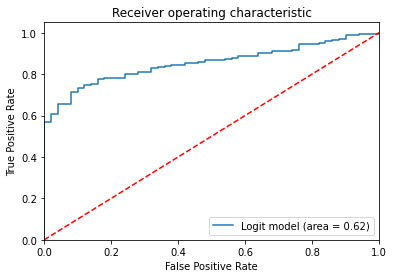

In [185]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(logreg.predict(X_test_logit), y_test)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test_logit)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logit model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Logit_ROC')
plt.show()

##  Дерево решений

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model_tree = DecisionTreeClassifier()

In [28]:
tree_params = {'max_depth': range(3,11),
'min_samples_split': range(3,11)}

In [34]:
tree_grid = GridSearchCV (model_tree, tree_params,
cv=3, n_jobs=-1,
verbose=True)

In [35]:
model_tree = DecisionTreeClassifier(random_state=100,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               # максимальная глубина дерева (количество слоев)
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False
                              )

# Обучаем модель
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, presort=False, random_state=100)

In [36]:
tree_grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    5.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'min_samples_split': range(3, 11)},
             verbose=True)

In [37]:
tree_grid.best_params_

{'max_depth': 5, 'min_samples_split': 7}

In [29]:
model_tree = DecisionTreeClassifier(random_state=100,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               # максимальная глубина дерева (количество слоев)
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               
                               min_samples_split=7,
                               # минимальное число элементов в листе (может быть долей)
                               
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False
                              )

# Обучаем модель
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=7,
                       presort=False, random_state=100)

In [30]:
y_pred_tree = model_tree.predict(X_test)

In [31]:
from sklearn import tree

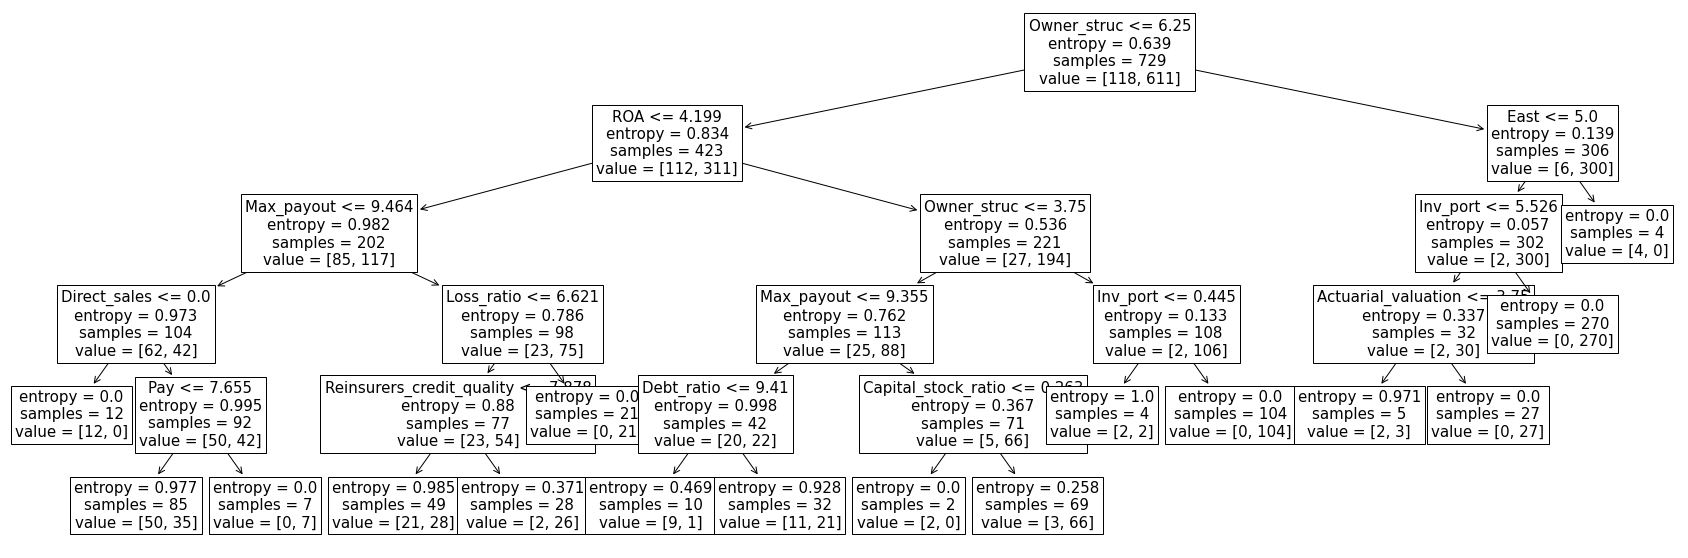

<Figure size 432x288 with 0 Axes>

In [196]:
plt.figure(figsize=(30,10))  # customize according to the size of your tree
_=tree.plot_tree(model_tree.fit(X_train, y_train), feature_names = X.columns, fontsize=15)
plt.show()
plt.savefig('tree')

In [32]:
roc_auc_score(y_pred_tree, y_test)

0.7448888091822096

In [42]:
Gini(roc_auc_score(model_tree.predict(X_test), y_test))

0.48977761836441913

In [43]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.8626198083067093


In [68]:
KS_test(y_pred_tree,y_test,default=0,no_def=1)

0.8348968105065667

In [47]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 246 недеф и 24 деф
# Неверно спрогнозированные: 26 недеф (на самом деле дефолты) и 17 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_tree)

array([[ 24,  26],
       [ 17, 246]])

In [191]:
report = classification_report(y_test, model_tree.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.59      0.48      0.53        50
           1       0.90      0.94      0.92       263

    accuracy                           0.86       313
   macro avg       0.74      0.71      0.72       313
weighted avg       0.85      0.86      0.86       313



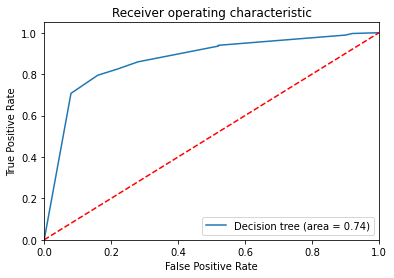

In [86]:
from sklearn.metrics import roc_curve
tree_roc_auc = roc_auc_score(y_pred_tree, y_test)
fpr, tpr, thresholds = roc_curve(y_test,model_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

##  Случайный лес

In [33]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [36]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model_RF = RandomForestClassifier(n_estimators=200)
#model_RF.fit(X_train, y_train)

In [51]:
RF_params = {'n_estimators': range(100,500,100)}

In [52]:
RF_grid = GridSearchCV (model_RF, RF_params,
cv=3, n_jobs=-1,
verbose=True)

In [53]:
RF_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.6s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1, param_grid={'n_estimators': range(100, 500, 100)},
             verbose=True)

In [54]:
RF_grid.best_params_

{'n_estimators': 100}

In [38]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [56]:
importances = model_RF.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), cols[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.0598, 'Max_payout'],
 [0.0557, 'ROE'],
 [0.0509, 'ROA'],
 [0.0503, 'Return_insurance'],
 [0.05, 'Prem_non-life_ins'],
 [0.0497, 'Market_rate'],
 [0.0476, 'Asset_liq'],
 [0.0447, 'Capital_stock_ratio'],
 [0.0421, 'Inv_port'],
 [0.042, 'Development_strategy'],
 [0.0386, 'Owner_struc'],
 [0.0386, 'Direct_sales'],
 [0.037, 'Loss_ratio'],
 [0.0369, 'Return_on_inv'],
 [0.0367, 'Solvency'],
 [0.0364, 'Reserves_non-life'],
 [0.0327, 'Reinsurers_credit_quality'],
 [0.029, 'Risk_management'],
 [0.0277, 'Debt_ratio'],
 [0.0219, 'Owner_infl'],
 [0.0197, 'Auditor_quality'],
 [0.015, 'Actuarial_valuation'],
 [0.0142, 'Governance'],
 [0.0084, 'Unemployment'],
 [0.0078, 'Revenue'],
 [0.0078, 'Prem'],
 [0.0078, 'East'],
 [0.0072, 'GDP_pc_const'],
 [0.0067, 'ROE_average'],
 [0.0067, 'Numb_contr'],
 [0.0064, 'Centre'],
 [0.0063, 'Pay_prem'],
 [0.0062, 'Mortality_rate'],
 [0.0058, 'Pay'],
 [0.0056, 'Pay_gdp'],
 [0.0055, 'Lowest_20'],
 [0.0052, 'Siberia'],
 [0.005, 'Actives_gdp'],
 [0.0048, 'Life_expec

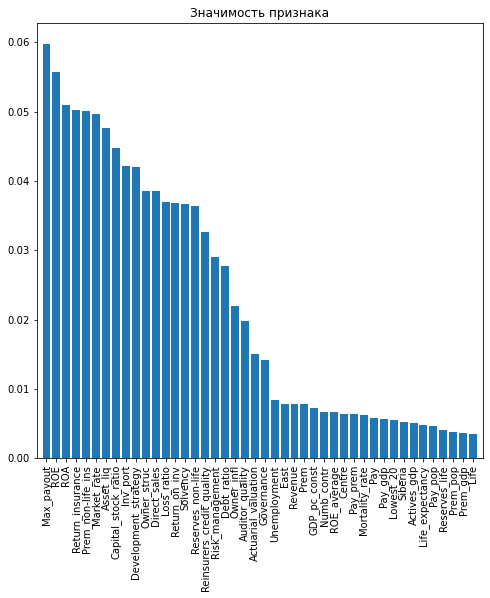

In [57]:
import matplotlib.pyplot as plt
#удобнее отобразить на столбчатой диаграмме
d_first = len(cols)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(cols)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [58]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model_RF.predict(X_test)))

Accuracy: 0.9041533546325878


In [59]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 254 недеф и 29 деф
# Неверно спрогнозированные: 21 недеф (на самом деле дефолты) и 9 дефолтов (в реальности недефолты)

confusion_matrix(y_test, model_RF.predict(X_test))

array([[ 29,  21],
       [  9, 254]])

In [39]:
roc_auc_score(model_RF.predict(X_test), y_test)

0.8558401855365803

In [69]:
KS_test(model_RF.predict(X_test),y_test,default=0,no_def=1)

0.8533933258342715

In [70]:
Gini(roc_auc_score(model_RF.predict(X_test), y_test))

0.6867942583732058

In [71]:
report = classification_report(y_test, model_RF.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        50
           1       0.92      0.97      0.94       263

    accuracy                           0.90       313
   macro avg       0.84      0.77      0.80       313
weighted avg       0.90      0.90      0.90       313



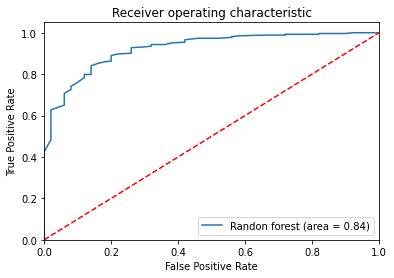

In [87]:
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(model_RF.predict(X_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test,model_RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Randon forest (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

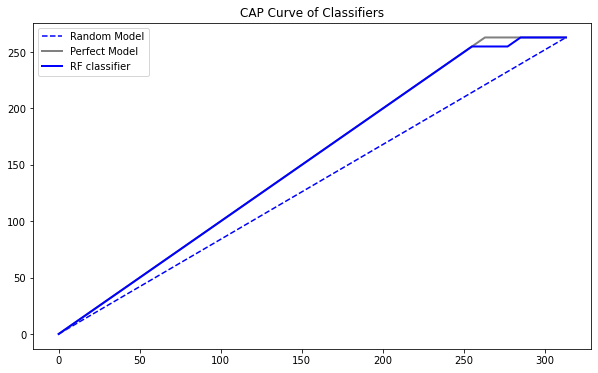

In [67]:
#Visualize the CAP Curve Analysis including all 4 classification models
total = len(y_test) 
one_count = np.sum((y_test)/10) 
zero_count = total - one_count
a = model.predict(X_test)/10
b = y_test/10
lm_rf = [y for _, y in sorted(zip(a,b), reverse = True)]
#lm_lr = [y for _, y in sorted(zip(y_pred_lr, y_test), reverse = True)] 
#lm_knn = [y for _, y in sorted(zip(y_pred_knn, y_test), reverse = True)] 
#lm_nb = [y for _, y in sorted(zip(y_pred_nb, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y_rf = np.append([0], np.cumsum(lm_rf)) 
#y_lr = np.append([0], np.cumsum(lm_lr)) 
#y_knn = np.append([0], np.cumsum(lm_knn)) 
#y_nb = np.append([0], np.cumsum(lm_nb)) 
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_rf, c = 'b', label = 'RF classifier', linewidth = 2)
#plt.plot(x, y_lr, c = 'r', label = 'LR classifier', linewidth = 2)
#plt.plot(x, y_knn, c = 'y', label = 'KNN classifier', linewidth = 2)
#plt.plot(x, y_nb, c = 'm', label = 'NB classifier', linewidth = 2)
plt.legend()

## Метод опорных векторов

In [41]:
from sklearn import svm

# Полиномиальное ядро

In [100]:
model_svm = svm.SVC(kernel='poly',probability=True)
model_svm.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [90]:
KS_test(model_svm.predict(X_test),y_test,default=0,no_def=1)

0.8573576799140704

In [91]:
roc_auc_score(model_svm.predict(X_test), y_test)

0.7803416821273964

In [94]:
Gini(roc_auc_score(model_svm.predict(X_test), y_test))

0.5606833642547928

In [95]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model_svm.predict(X_test)))

Accuracy: 0.8817891373801917


In [96]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 245 недеф и 31 деф
# Неверно спрогнозированные: 19 недеф (на самом деле дефолты) и 18 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_svm.predict(X_test))

array([[ 31,  19],
       [ 18, 245]])

In [97]:
report = classification_report(y_test, model_svm.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.63      0.62      0.63        50
           1       0.93      0.93      0.93       263

    accuracy                           0.88       313
   macro avg       0.78      0.78      0.78       313
weighted avg       0.88      0.88      0.88       313



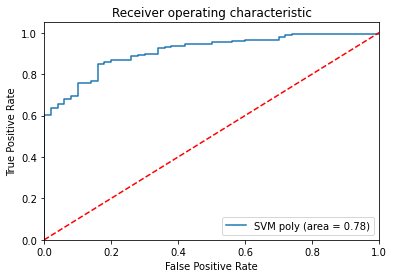

In [101]:
from sklearn.metrics import roc_curve
SVM_poly_roc_auc = roc_auc_score(model_svm.predict(X_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test,model_svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM poly (area = %0.2f)' % SVM_poly_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_poly_ROC')
plt.show()

 # Линейное


In [103]:
model_svm1 = svm.SVC(kernel='linear',degree = 3, probability=True)
model_svm1.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [104]:
roc_auc_score(model_svm1.predict(X_test), y_test)

0.7381749049429659

In [106]:
KS_test(model_svm1.predict(X_test),y_test,default=0,no_def=1)

0.8998491135420584

In [105]:
Gini(roc_auc_score(model_svm1.predict(X_test), y_test))

0.4763498098859318

In [107]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model_svm1.predict(X_test)))

Accuracy: 0.8594249201277955


In [108]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 241 недеф и 28 деф
# Неверно спрогнозированные: 22 недеф (на самом деле дефолты) и 22 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_svm1.predict(X_test))

array([[ 28,  22],
       [ 22, 241]])

In [109]:
report = classification_report(y_test, model_svm1.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        50
           1       0.92      0.92      0.92       263

    accuracy                           0.86       313
   macro avg       0.74      0.74      0.74       313
weighted avg       0.86      0.86      0.86       313



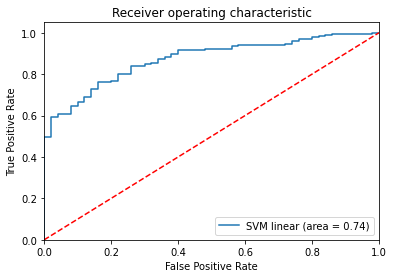

In [110]:
from sklearn.metrics import roc_curve
SVM_lin_roc_auc = roc_auc_score(model_svm1.predict(X_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test,model_svm1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM linear (area = %0.2f)' % SVM_lin_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_lin_ROC')
plt.show()

 # Rbf


In [42]:
model_svm2 = svm.SVC(kernel='rbf',degree = 3, probability=True)
model_svm2.fit(X_train, y_train)

SVC(probability=True)

In [43]:
roc_auc_score(model_svm2.predict(X_test), y_test)

0.7970732410611303

In [114]:
KS_test(model_svm2.predict(X_test),y_test,default=0,no_def=1)

0.8712121212121212

In [113]:
Gini(roc_auc_score(model_svm2.predict(X_test), y_test))

0.5941464821222606

In [115]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model_svm2.predict(X_test)))

Accuracy: 0.8722044728434505


In [116]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 256 недеф и 17 деф
# Неверно спрогнозированные: 33 недеф (на самом деле дефолты) и 7 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_svm2.predict(X_test))

array([[ 17,  33],
       [  7, 256]])

In [117]:
report = classification_report(y_test, model_svm2.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.71      0.34      0.46        50
           1       0.89      0.97      0.93       263

    accuracy                           0.87       313
   macro avg       0.80      0.66      0.69       313
weighted avg       0.86      0.87      0.85       313



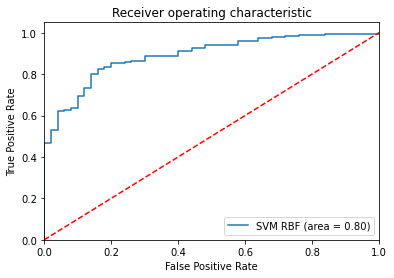

In [118]:
from sklearn.metrics import roc_curve
SVM_rbf_roc_auc = roc_auc_score(model_svm2.predict(X_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test,model_svm2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM RBF (area = %0.2f)' % SVM_rbf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_RBF_ROC')
plt.show()

# Сравнение SVM CAP analys

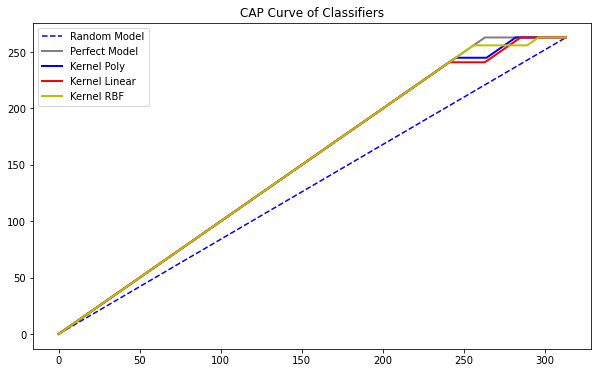

In [131]:
#change
total = len(y_test)
one_count = (np.sum(y_test))
zero_count = total - one_count
real = y_test
poly = model_svm.predict(X_test)
lin = model_svm1.predict(X_test)
rbf = model_svm2.predict(X_test)
lm_poly = [y for _, y in sorted(zip(poly, real), reverse = True)]
lm_lin = [y for _, y in sorted(zip(lin, real), reverse = True)] 
lm_rbf = [y for _, y in sorted(zip(rbf, real), reverse = True)] 
#lm_nb = [y for _, y in sorted(zip(y_pred_nb, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y_poly = np.append([0], np.cumsum(lm_poly)) 
y_lin = np.append([0], np.cumsum(lm_lin)) 
y_rbf = np.append([0], np.cumsum(lm_rbf)) 
#y_nb = np.append([0], np.cumsum(lm_nb)) 
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_poly, c = 'b', label = 'Kernel Poly', linewidth = 2)
plt.plot(x, y_lin, c = 'r', label = 'Kernel Linear', linewidth = 2)
plt.plot(x, y_rbf, c = 'y', label = 'Kernel RBF', linewidth = 2)
#plt.plot(x, y_nb, c = 'm', label = 'NB classifier', linewidth = 2)
plt.legend()

## Градиентный бустинг

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gradient_boosted = GradientBoostingClassifier()

# Fit the model on the training data
gradient_boosted.fit(X_train, y_train)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gradient_boosted = GradientBoostingClassifier()

In [134]:
GB_params = {'learning_rate':(0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1)}

In [135]:
GB_grid = GridSearchCV (gradient_boosted, GB_params,
cv=3, n_jobs=-1,
verbose=True)

In [136]:
GB_grid.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    8.9s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1)},
             verbose=True)

In [137]:
GB_grid.best_params_

{'learning_rate': 0.4}

In [46]:
gradient_boosted = GradientBoostingClassifier(learning_rate=0.4,max_depth = 5, min_samples_split = 7)
gradient_boosted.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=5, min_samples_split=7)

In [47]:
roc_auc_score(gradient_boosted.predict(X_test), y_test)

0.8219734660033169

In [141]:
KS_test(gradient_boosted.predict(X_test),y_test,default=0,no_def=1)

0.8271111111111109

In [140]:
Gini(roc_auc_score(gradient_boosted.predict(X_test), y_test))

0.6439469320066338

In [142]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, gradient_boosted.predict(X_test)))

Accuracy: 0.9009584664536742


In [143]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 246 недеф и 23 деф
# Неверно спрогнозированные: 27 недеф (на самом деле дефолты) и 17 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gradient_boosted.predict(X_test))

array([[ 32,  18],
       [ 13, 250]])

In [144]:
report = classification_report(y_test, gradient_boosted.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        50
           1       0.93      0.95      0.94       263

    accuracy                           0.90       313
   macro avg       0.82      0.80      0.81       313
weighted avg       0.90      0.90      0.90       313



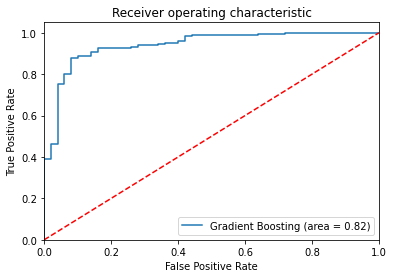

In [145]:
from sklearn.metrics import roc_curve
GrB_roc_auc = roc_auc_score(gradient_boosted.predict(X_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test,gradient_boosted.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % GrB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gradient_Boosting_ROC')
plt.show()

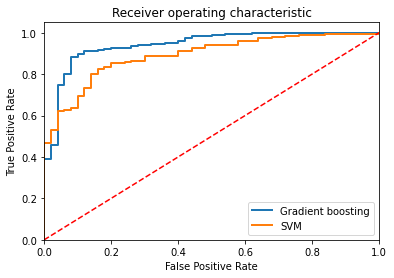

In [60]:
from sklearn.metrics import roc_curve
GrB_roc_auc = roc_auc_score(gradient_boosted.predict(X_test), y_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test,gradient_boosted.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test,model_svm2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_gb, tpr_gb, label = 'Gradient boosting', linewidth = 2)
plt.plot(fpr_svm, tpr_svm, label = 'SVM', linewidth = 2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.savefig('ROC')
plt.show()

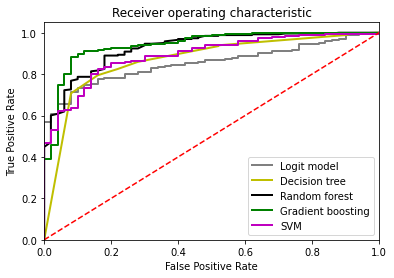

In [59]:
from sklearn.metrics import roc_curve
GrB_roc_auc = roc_auc_score(gradient_boosted.predict(X_test), y_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test,gradient_boosted.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test,model_svm2.predict_proba(X_test)[:,1])
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test,logreg.predict_proba(X_test_logit)[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,model_tree.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,model_RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_logit, tpr_logit, c = 'grey', label = 'Logit model', linewidth = 2)
plt.plot(fpr_dt, tpr_dt, c = 'y', label = 'Decision tree', linewidth = 2)
plt.plot(fpr_rf, tpr_rf, c = 'black', label = 'Random forest', linewidth = 2)
plt.plot(fpr_gb, tpr_gb, c = 'green', label = 'Gradient boosting', linewidth = 2)
plt.plot(fpr_svm, tpr_svm, c = 'm', label = 'SVM', linewidth = 2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.savefig('ROC')
plt.show()

## Сравнение СAP для всех моделей

In [54]:
y_test.head()

764    1
214    1
889    0
634    1
650    1
Name: Default, dtype: int64

In [55]:
check = abs(y_test-1)
check.head()

764    0
214    0
889    1
634    0
650    0
Name: Default, dtype: int64

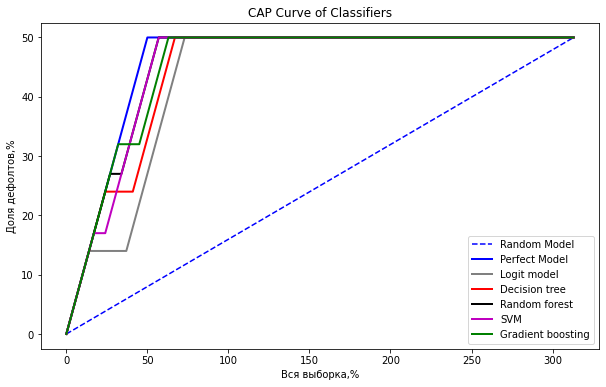

In [56]:
#change
total = len(y_test)
one_count = (np.sum(abs(y_test-1)))
zero_count = total - one_count
real = abs(y_test-1)
logit = abs(logreg.predict(X_test_logit)-1)
tree = abs(model_tree.predict(X_test)-1)
random_forest= abs(model_RF.predict(X_test)-1)
svm_rbf = abs(model_svm2.predict(X_test)-1)
gradient_boosting = abs(gradient_boosted.predict(X_test)-1)
m_logit = [y for _, y in sorted(zip(logit, real), reverse = True)]
m_tree = [y for _, y in sorted(zip(tree, real), reverse = True)]
m_ranfor = [y for _, y in sorted(zip(random_forest, real), reverse = True)] 
m_svm_rbf = [y for _, y in sorted(zip(svm_rbf, real), reverse = True)] 
m_gradboost = [y for _, y in sorted(zip(gradient_boosting, real), reverse = True)]
x = np.arange(0, total + 1)
y_logit = np.append([0], np.cumsum(m_logit)) 
y_tree = np.append([0], np.cumsum(m_tree)) 
y_ranfor = np.append([0], np.cumsum(m_ranfor))
y_svm_rbf = np.append([0], np.cumsum(m_svm_rbf))
y_gradboost = np.append([0], np.cumsum(m_gradboost))
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'b', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_logit, c = 'grey', label = 'Logit model', linewidth = 2)
plt.plot(x, y_tree, c = 'r', label = 'Decision tree', linewidth = 2)
plt.plot(x, y_ranfor, c = 'black', label = 'Random forest', linewidth = 2)
plt.plot(x, y_svm_rbf, c = 'm', label = 'SVM', linewidth = 2)
plt.plot(x, y_gradboost, c = 'green', label = 'Gradient boosting', linewidth = 2)
plt.xlabel('Вся выборка,%')
plt.ylabel('Доля дефолтов,%')
plt.legend()